<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/ANN_for_calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#Loading Dataset
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.head()

### Generating Matrix of Features (X)


The basic principle while creating a machine learning model is to generate X also called as Matrix of Features. This X basically contains all our independent variables. Let’s create the same here.

In [ ]:

X = data.iloc[:,3:-1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Here I have used iloc method of Pandas data frame which allows us to fetch the desired values from the desired column within the dataset. Here as we can see that we are fetching all the data from the 3rd column till the last minus one column. The reason for that is the first 3 columns i.e RowNumber, CustomerId, and Surname have nothing to do with deciding whether the customer is going to exit or not. Hence in this case we started fetching all the values from the 3rd column onwards. Lastly, since our last column is basically a dependent variable hence we have mentioned -1 in iloc method using which allows us to exclude the last column from being included in our matrix of features X.

### Generating Dependent Variable Vector(Y)
In the same fashion where we have created our matrix of features(X) for the independent variable, we also have to create a dependent variable vector(Y) which will only contain our dependent variable values.

In [ ]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values

Here our gender column has only 2 categories which are male and female, we are going to use LabelEncoding. This type of encoding will simply convert this column into a column having values of 0 and 1. In order to use Label Encoding, we are going to use LabelEncoder class from sklearn library.

In [ ]:
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [ ]:
X[:,2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

### Encoding Categorical Variable Country
Now let’s deal with another categorical column named country. This column has a cardinality of 3 meaning that it has 3 distinct categories present i.e France, Germany, Spain.

In one hot encoding, all the string values are converted into binary streams of 0’s and 1’s. One-hot encoding ensures that the machine learning algorithm does not assume that higher numbers are more important.

In [ ]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

What is the use of ColumnTransformer? Well, ColumnTransformer is another class in sklearn that will allow us to select a particular column from our dataset on which we can apply one-hot encoding.

### Splitting Dataset into Training and Testing Dataset


In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing Artificial Neural Network


In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

Once we initialize our ann, we are now going to create layers for the same. Here we are going to create a network that will have 2 hidden layers, 1 input layer, and 1 output layer. So, let’s create our very first hidden layer

In [ ]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

Here we have created our first hidden layer by using the Dense class which is part of the layers module. This class accepts 2 inputs:-

1. units:- number of neurons that will be present in the respective layer

2. activation:- specify which activation function to be used

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

### Creating Output Layer
In this step, we are going to create our output layer for ann. The output layer will be responsible for giving output.

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

Here again, we are going to use the Dense class in order to create the output layer. Two important things to remember here:-

1. In a binary classification problem(like this one) where we will be having only two classes as output (1 and 0), we will be allocating only one neuron to output this result. For the multiclass classification problem, we have to use more than one neuron in the output layer. For example – if our output contains 4 categories then we need to create 4 different neurons[one for each category].

2. For the binary classification Problems, the activation function that should always be used is sigmoid. For a multiclass classification problem, the activation function that should be used is softmax.

Here since we are dealing with binary classification hence we are allocating only one neuron in the output layer and the activation function which is used is softmax.

# Compiling Artificial Neural Network
We have now created layers for our neural network. In this step, we are going to compile our ANN.

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

We have used compile method of our ann object in order to compile our network. Compile method accepts the below inputs:-

1. **optimizer**:- specifies which optimizer to be used in order to perform stochastic gradient descent. I had experimented with various optimizers like RMSProp, adam and I have found that adam optimizer is a reliable one that can be used with any neural network.

2. **loss**:- specifies which loss function should be used. For binary classification, the value should be binary_crossentropy. For multiclass classification, it should be categorical_crossentropy.

3. **metrics**:- which performance metrics to be used in order to compute performance. Here we have used accuracy as a performance metric.

# Fitting Artificial Neural Network
This is the last step in our ann creation process. Here we are just going to train our ann on the training dataset.

In [ ]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 30)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6256 - accuracy: 0.7380
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7976
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8033
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8125
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8190
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8231
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8261
Epoch 8/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8303
Epoch 9/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8322
Epoch 10/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8314

Here we have used the fit method in order to train our ann. The fit method is accepting 4 inputs in this case:-

1**.X_train:**- Matrix of features for the training dataset

2.**Y_train:-** Dependent variable vectors for the training dataset

3**.batch_size:** how many observations should be there in the batch. Usually, the value for this parameter is 32 but we can experiment with any other value as well.

4.**epochs:** How many times neural networks will be trained. Here the optimal value that I have found from my experience is 100.

*Here we can see that in each epoch our loss is decreasing and our accuracy is increasing. As we can see here that our final accuracy is 86.59 which is pretty remarkable for a neural network with this simplicity.*

# Predicting Result for Single Point Observation
Here our neural network is trying to predict whether our customer is going to exit or not based on the values of independent variables

In [ ]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

1/1 [==============================] - 0s 148ms/step
[[False]]


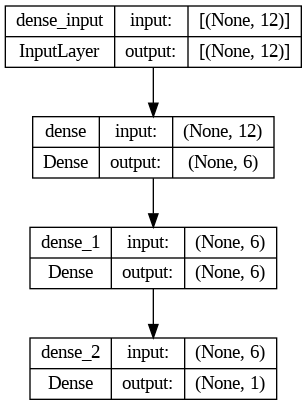

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)